In [4]:
! pip install pandas numpy matplotlib seaborn tensorflow scikit-learn

  Using cached tensorflow-2.14.0-cp310-cp310-win_amd64.whl (2.1 kB)



[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import glob
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
file_paths = glob.glob('dataset_020/color_dataset*.txt')
dfs = []

In [7]:
def remove_outliers(df, column_name, batch_size = 100, hop_length_ratio = 0.5, threshold = 0.05):
    """
    Function to find and remove outliers in a DataFrame. It checks values in one column and looks for an outlier
    based on the percentage difference from the average of the batch values. If a value is more than
    the threshold percentage different from the average, it is flagged as an outlier and removed.

    :param df: A pandas DataFrame containing the dataset.
    :param column_name: The name of the column to check for outliers.
    :param batch_size: The number of rows in each batch.
    :param hop_length_ratio: The ratio of the batch size to determine the hop length for overlapping batches.
    :param threshold: The percentage difference from the average to use as a threshold for determining outliers.
    :return: The DataFrame with outliers removed and a list of row indices that were considered outliers.
    """
    outliers = []
    hop_length = int(batch_size * hop_length_ratio)  # Determine hop length based on batch size and ratio
    data_column = df[column_name].to_numpy()  # Extract the relevant column

    # Loop over the dataset in batches with the defined hop length
    for start in range(0, len(data_column), hop_length):
        end = start + batch_size
        batch = data_column[start:end]
        mean = np.mean(batch)

        # Calculate the percentage difference from the mean for each value in the batch
        percentage_diff = np.abs((batch - mean) / mean)

        # Find indices where the percentage difference is greater than the threshold
        batch_outliers = np.where(percentage_diff > threshold)[0] + start
        outliers.extend(batch_outliers)

    # Ensure that the outlier indices are within the bounds of the data array
    outliers = [index for index in outliers if index < len(data_column)]
    
    # Remove duplicate indices due to overlapping batches
    outliers = list(set(outliers))

    # Remove outliers from the DataFrame
    clean_df = df.drop(index=outliers).reset_index(drop=True)

    return clean_df, sorted(outliers)

# Example call of the function (assuming 'df' is your DataFrame and 'column_name' is the column to check)
# This will find and remove outliers in the specified column with a batch size of 5, a hop length ratio of 0.25, and a threshold of 1%
# clean_df,


In [8]:
test = pd.read_csv('dataset_020/color_dataset01.txt', sep=',', header=None, usecols=[1,2,3,4,5], names=["control_value", "R", "G", "B", "W"] )

In [9]:
outlier_rowsR = remove_outliers(df = test, column_name = "R", batch_size = 100, hop_length_ratio = 0.5, threshold = 0.05)[1]
outlier_rowsG = remove_outliers(df = test, column_name = "G", batch_size = 100, hop_length_ratio = 0.5, threshold = 0.05)[1]
outlier_rowsB = remove_outliers(df = test, column_name = "B", batch_size = 100, hop_length_ratio = 0.5, threshold = 0.1)[1]
outlier_rowsW = remove_outliers(df = test, column_name = "W", batch_size = 100, hop_length_ratio = 0.5, threshold = 0.05)[1]
print(outlier_rowsR)
print(outlier_rowsG)
print(outlier_rowsB)
print(outlier_rowsW)

[0, 997, 998, 999]
[0, 997, 998, 999]
[0, 997, 998, 999]
[0, 997, 998, 999]


In [10]:
dfs = []
for file_path in file_paths:
    df = pd.read_csv(file_path, sep=',', header=None, usecols=[1,2,3,4,5], names=["control_value", "R", "G", "B", "W"] )
    df = remove_outliers(df = df, column_name = "R", batch_size = 100, hop_length_ratio = 0.5, threshold = 0.05)[0]
    df = remove_outliers(df = df, column_name = "G", batch_size = 100, hop_length_ratio = 0.5, threshold = 0.05)[0]
    df = remove_outliers(df = df, column_name = "B", batch_size = 100, hop_length_ratio = 0.5, threshold = 0.1)[0]
    df = remove_outliers(df = df, column_name = "W", batch_size = 100, hop_length_ratio = 0.5, threshold = 0.05)[0]
    dfs.append(df)
    
final_df = pd.concat(dfs, ignore_index=True)

In [11]:
final_df

,control_value,R,G,B,W
0,0.002,1332,896,672,2765
1,0.003,1330,894,670,2759
2,0.004,1329,893,670,2756
3,0.005,1329,892,669,2755
4,0.006,1329,892,669,2755
...,...,...,...,...,...
19955,0.995,8175,13192,13746,35797
19956,0.996,8168,13196,13758,35809
19957,0.997,8161,13201,13769,35819
19958,0.998,8160,13201,13769,35820


In [12]:
final_df.to_csv('dataset_020/color_dataset_concat.csv', index=False)

## Plot

In [13]:
dfi = final_df.reset_index()
dfi

,index,control_value,R,G,B,W
0,0,0.002,1332,896,672,2765
1,1,0.003,1330,894,670,2759
2,2,0.004,1329,893,670,2756
3,3,0.005,1329,892,669,2755
4,4,0.006,1329,892,669,2755
...,...,...,...,...,...,...
19955,19955,0.995,8175,13192,13746,35797
19956,19956,0.996,8168,13196,13758,35809
19957,19957,0.997,8161,13201,13769,35819
19958,19958,0.998,8160,13201,13769,35820


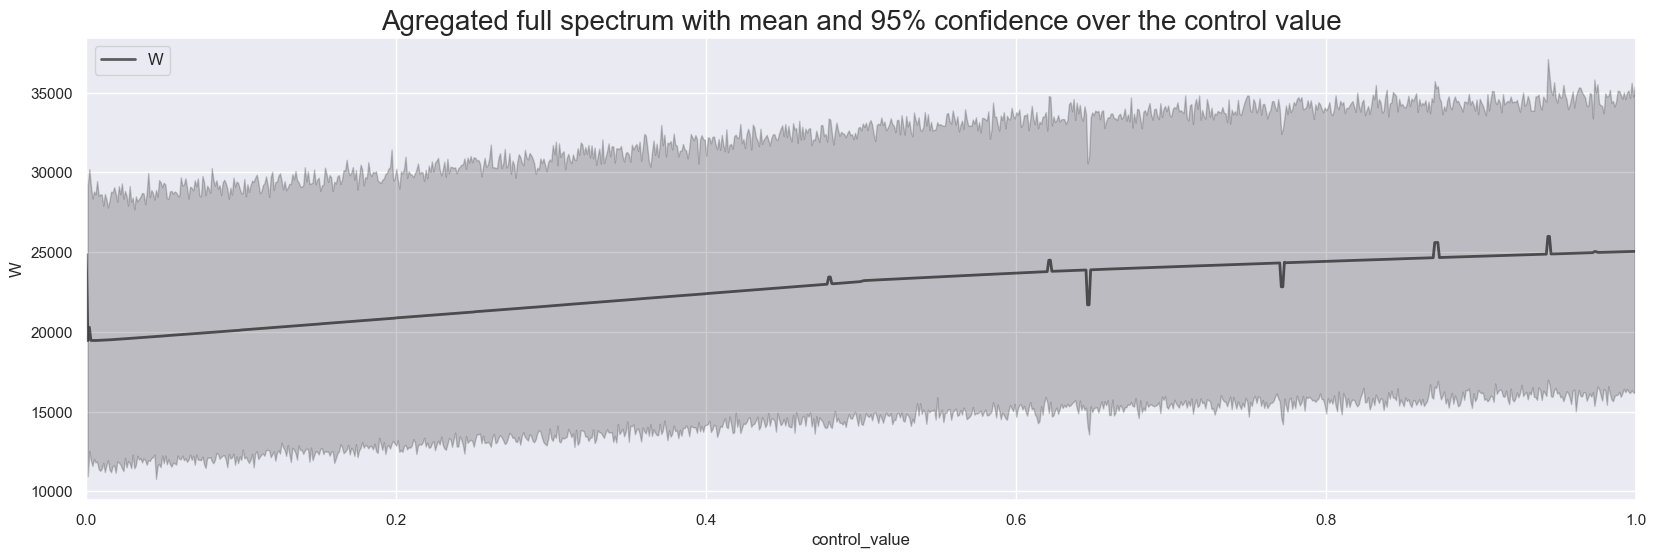

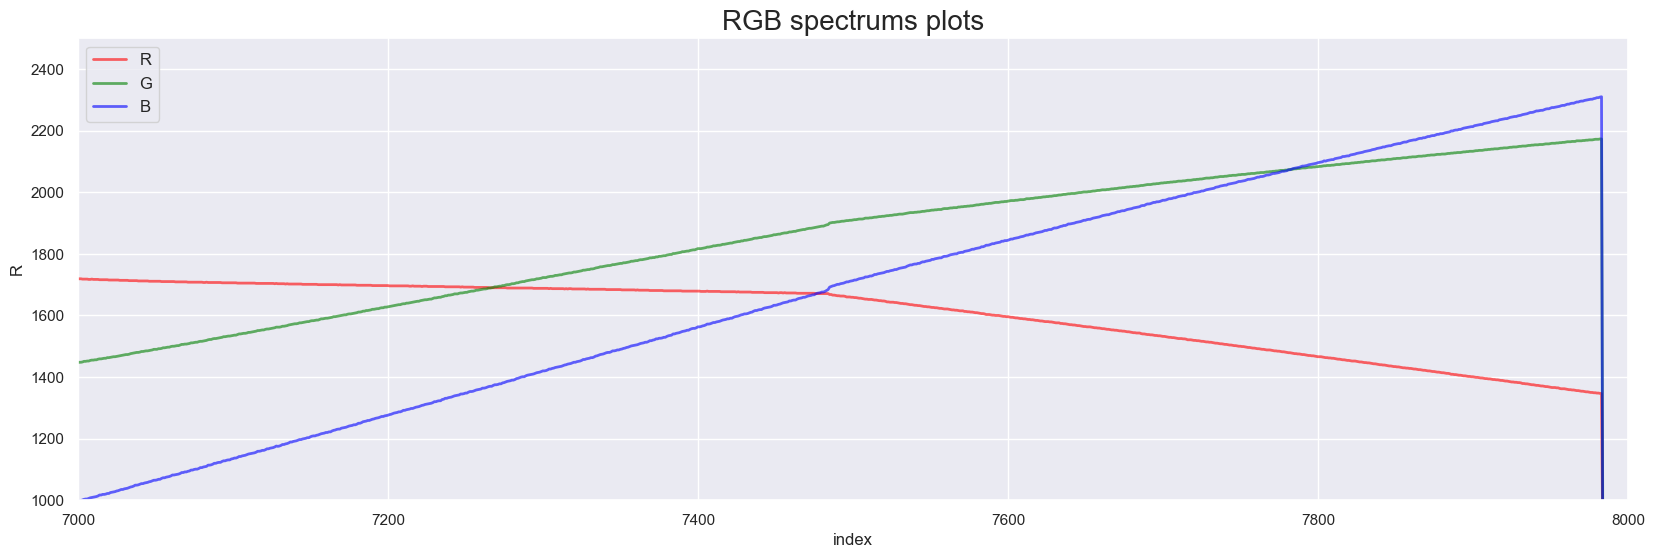

In [14]:
sns.set_theme(style="darkgrid")

plt.figure(figsize=(20,6))
plt.title("Agregated full spectrum with mean and 95% confidence over the control value", fontsize=20)

sns.lineplot(data=dfi, x="control_value", y="W", color="black", label="W", linewidth=2, alpha=0.6)
plt.xlim(0, 1)
plt.legend(loc='upper left', fontsize=12)
plt.show()

plt.figure(figsize=(20,6))
plt.title("RGB spectrums plots", fontsize=20)

sns.lineplot(data=dfi, x="index", y="R", color="red", label="R", linewidth=2, alpha=0.6)
sns.lineplot(data=dfi, x="index", y="G", color="green", label="G",  linewidth=2, alpha=0.6)
sns.lineplot(data=dfi, x="index", y="B", color="blue", label="B",  linewidth=2, alpha=0.6)

plt.xlim(7000, 8000)
plt.ylim(1000, 2500)
plt.legend(loc='upper left', fontsize=12)
plt.show()

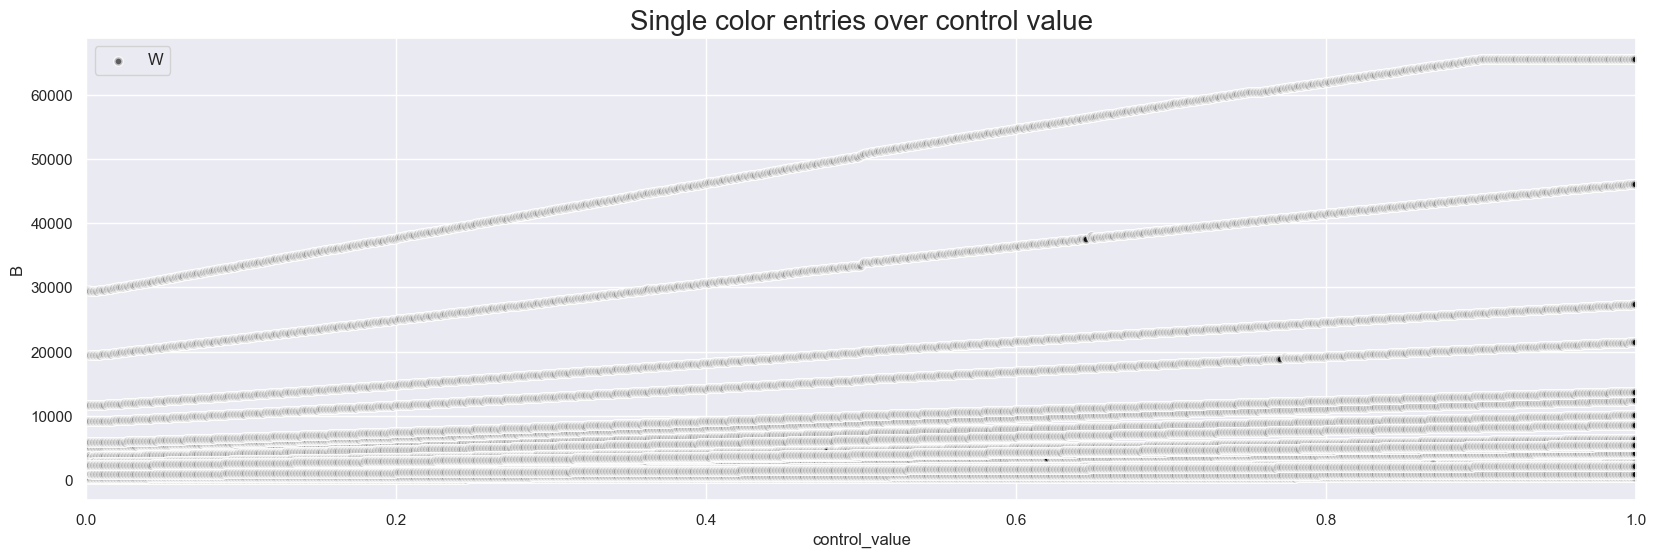

In [15]:
plt.figure(figsize=(20,6))
plt.title("Single color entries over control value", fontsize=20)

sns.scatterplot(data=dfi, x="control_value", y="B", color="black", label="W", linewidth=2, alpha=0.6)
plt.xlim(0, 1)
plt.legend(loc='upper left', fontsize=12)
plt.show()

## Create Model

In [16]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras import layers
from keras import models
import joblib

# Load the dataset
df = pd.read_csv('dataset_020/color_dataset_concat.csv')

# Split the dataset into training and testing sets
X = df[['R', 'G', 'B', 'W']]
y = df['control_value']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
joblib.dump(scaler, 'dataset20_scaler.save')

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

inputs = layers.Input(shape=(4,))
reshaped_inputs = layers.Reshape((4, 1))(inputs)

# CNN branch
conv1 = layers.Conv1D(64, kernel_size=2, activation='relu')(reshaped_inputs)
conv2 = layers.Conv1D(128, kernel_size=2, activation='relu')(conv1)
flattened = layers.Flatten()(conv2)

# Fully connected branch
fc = layers.Dense(256, activation='relu')(inputs)
fc = layers.Dense(256, activation='relu')(fc)

# Combine CNN and FC branches
combined = layers.concatenate([flattened, fc])

# Final dense layers
combined = layers.Dense(512, activation='relu')(combined)
combined = layers.Dense(128, activation='relu')(combined)
combined = layers.Dense(32, activation='relu')(combined)
output = layers.Dense(1)(combined)

model =[]
# Create hybrid model
model = models.Model(inputs=inputs, outputs=output)


# Compile the model
model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(0.000001), metrics=['mae', 'mse'])

In [17]:
# Train the model
history = model.fit(X_train, y_train, epochs=500, validation_split=0.2, verbose=1)

Epoch 1/500
400/400 [==============================] - 5s 10ms/step - loss: 0.3209 - mae: 0.4881 - mse: 0.3209 - val_loss: 0.2940 - val_mae: 0.4614 - val_mse: 0.2940
Epoch 2/500
400/400 [==============================] - 3s 9ms/step - loss: 0.2882 - mae: 0.4561 - mse: 0.2882 - val_loss: 0.2611 - val_mae: 0.4282 - val_mse: 0.2611
Epoch 3/500
400/400 [==============================] - 3s 8ms/step - loss: 0.2525 - mae: 0.4202 - mse: 0.2525 - val_loss: 0.2235 - val_mae: 0.3890 - val_mse: 0.2235
Epoch 4/500
400/400 [==============================] - 4s 9ms/step - loss: 0.2150 - mae: 0.3817 - mse: 0.2150 - val_loss: 0.1885 - val_mae: 0.3513 - val_mse: 0.1885
Epoch 5/500
400/400 [==============================] - 3s 8ms/step - loss: 0.1844 - mae: 0.3494 - mse: 0.1844 - val_loss: 0.1628 - val_mae: 0.3233 - val_mse: 0.1628
Epoch 6/500
400/400 [==============================] - 3s 8ms/step - loss: 0.1617 - mae: 0.3255 - mse: 0.1617 - val_loss: 0.1438 - val_mae: 0.3031 - val_mse: 0.1438
Epoch 7/5

In [25]:
# Evaluate the model
loss, mae, mse = model.evaluate(X_test, y_test, verbose=2)

125/125 - 0s - loss: 1.2036e-04 - mae: 0.0079 - mse: 1.2036e-04 - 409ms/epoch - 3ms/step


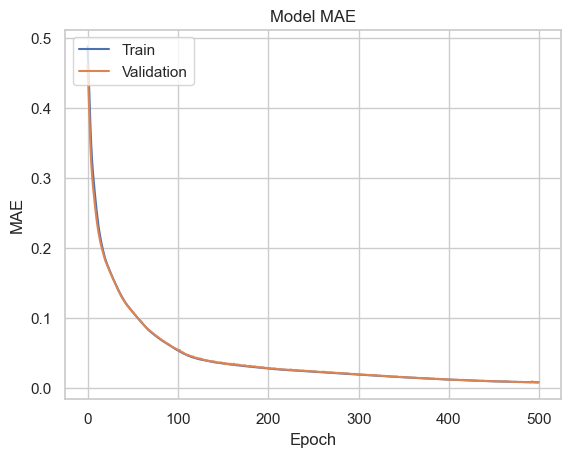

In [26]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [27]:
model.save('model_020.keras')

In [28]:
# Use the model for prediction
predictions = model.predict(X_test)

125/125 [==============================] - 0s 3ms/step


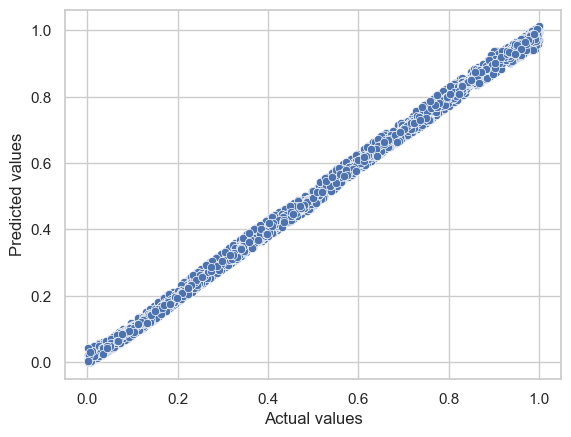

In [29]:
# Plot the predictions against the actual values
sns.scatterplot(x=y_test, y=predictions.flatten())
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()


In [30]:
X_train.shape[1]

4

Best Prediction Errors:
Index: 1275, Absolute Error: 3.032207488984362e-06
Index: 2196, Absolute Error: 3.444433212262954e-06
Index: 2775, Absolute Error: 4.284620285011087e-06
Index: 184, Absolute Error: 7.101297378540872e-06
Index: 2638, Absolute Error: 7.53450393675692e-06
Index: 1542, Absolute Error: 7.985875010490563e-06
Index: 573, Absolute Error: 9.367629885672843e-06
Index: 3317, Absolute Error: 9.661912918068616e-06
Index: 2220, Absolute Error: 1.2135908007620405e-05
Index: 1371, Absolute Error: 1.278948783872691e-05

Worst Prediction Errors:
Index: 2166, Absolute Error: 0.028949696063995334
Index: 2148, Absolute Error: 0.02895057535171508
Index: 271, Absolute Error: 0.028976814985275268
Index: 1336, Absolute Error: 0.02899848818778994
Index: 2282, Absolute Error: 0.02900907254219054
Index: 815, Absolute Error: 0.02911292004585264
Index: 2026, Absolute Error: 0.029120498657226546
Index: 3756, Absolute Error: 0.029127667427062964
Index: 2001, Absolute Error: 0.02916541886329649

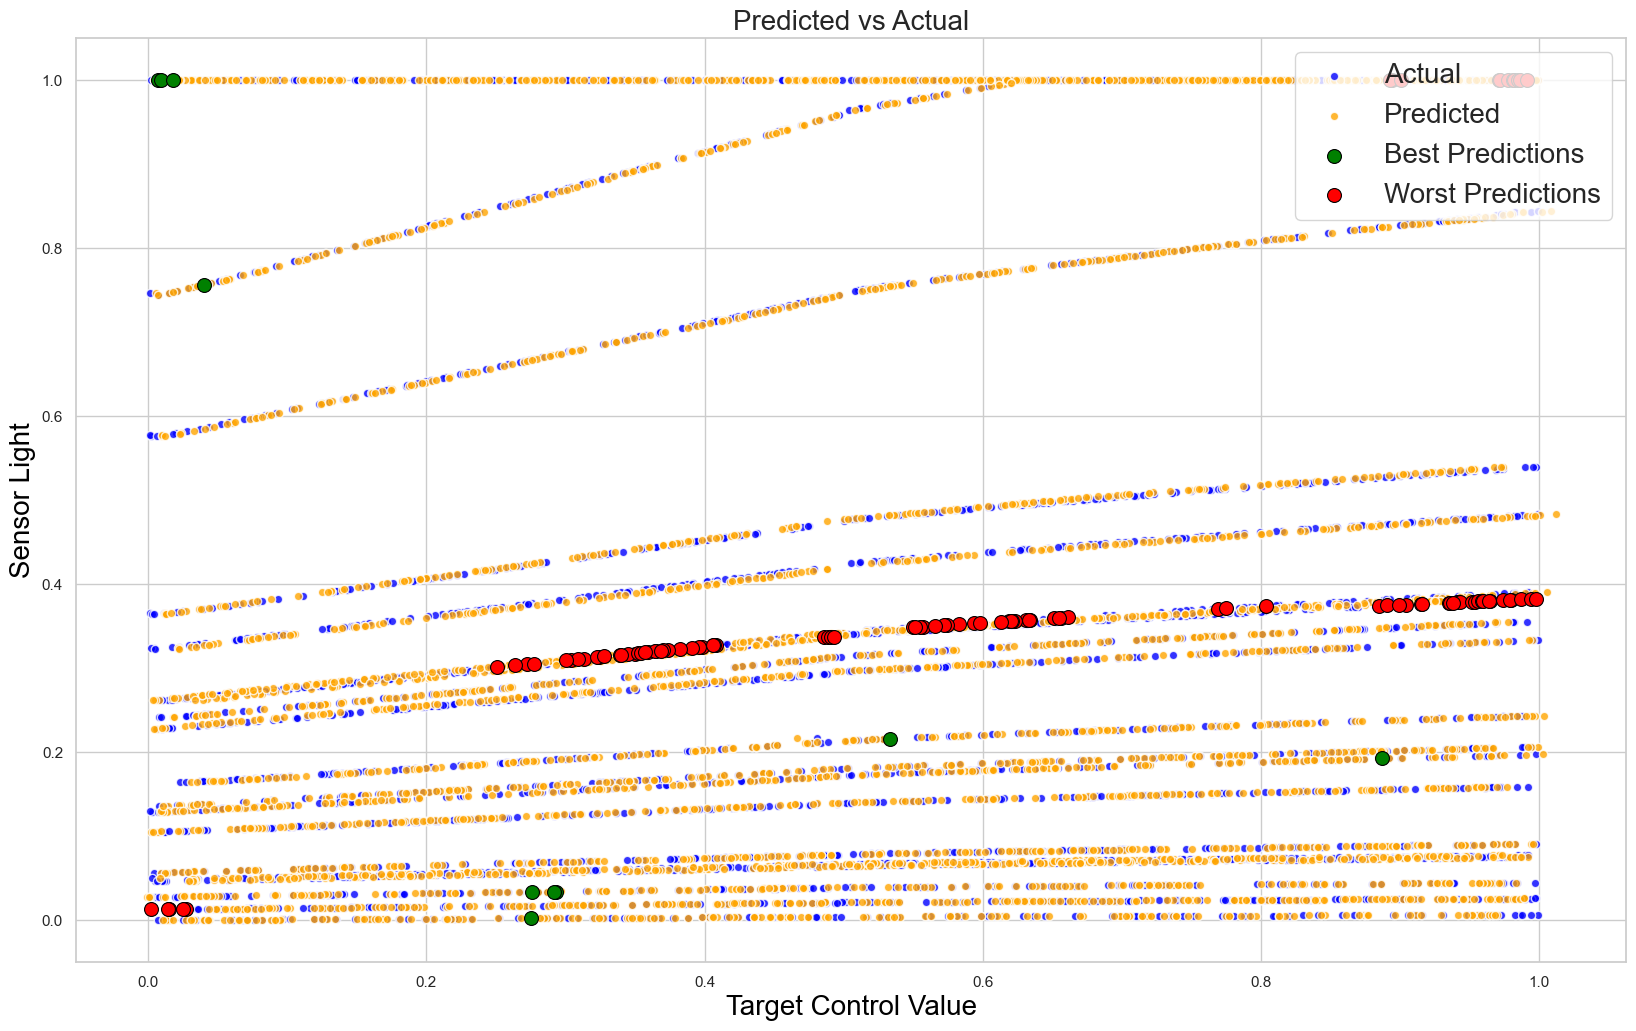

In [31]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Reset the index of y_test to allow direct indexing after the train-test split
y_test = y_test.reset_index(drop=True)

# Calculate prediction errors
errors = predictions.flatten() - y_test

# Get the indices of the best and worst predictions
best_pred_indices = np.argsort(np.abs(errors))[:10]  # Indices of the 10 best predictions
worst_pred_indices = np.argsort(np.abs(errors))[-100:]  # Indices of the 10 worst predictions



absolute_errors = np.abs(errors)

best_pred_errors = absolute_errors.iloc[best_pred_indices]
worst_pred_errors = absolute_errors.iloc[worst_pred_indices]

print("Best Prediction Errors:")
for i, index in enumerate(best_pred_indices):
    print(f"Index: {index}, Absolute Error: {best_pred_errors.iloc[i]}")

print("\nWorst Prediction Errors:")
for i, index in enumerate(worst_pred_indices):
    print(f"Index: {index}, Absolute Error: {worst_pred_errors.iloc[i]}")
    



# Adjust your slicing here, if necessary
slice_min = 0
slice_max = len(y_test)  
col_slice = 3  # The feature  to plot


sns.set_style("whitegrid")
plt.figure(figsize=(20,12))
plt.title("Predicted vs Actual", fontsize=20)

sns.scatterplot(x=y_test[slice_min:slice_max], y=X_test[slice_min:slice_max, col_slice], color="blue", label="Actual", linewidth=1, alpha=0.8)
sns.scatterplot(x=predictions.flatten()[slice_min:slice_max], y=X_test[slice_min:slice_max, col_slice], color="orange", label="Predicted", linewidth=1, alpha=0.8)

# Highlight the best predictions
sns.scatterplot(x=y_test[best_pred_indices], y=X_test[best_pred_indices, col_slice], color="green", label="Best Predictions", s=100, edgecolor='black')

# Highlight the worst predictions
sns.scatterplot(x=y_test[worst_pred_indices], y=X_test[worst_pred_indices, col_slice], color="red", label="Worst Predictions", s=100, edgecolor='black')


plt.xlabel('Target Control Value', color='black', fontsize=20)
plt.ylabel('Sensor Light', color='black', fontsize=20)
plt.legend(loc='upper right', fontsize=20)
plt.show()
